In [5]:
#code 1

[-1.18201897  0.87816742 -2.18929523  0.6822295   0.39677817  0.17833423
 -0.6393678   0.40492731]
Melhores parametros: {'alpha': 0.1, 'l1_ratio': 0.1}
Erro teste: 0.10452658661707676
Erro treino: 0.10230013219622229


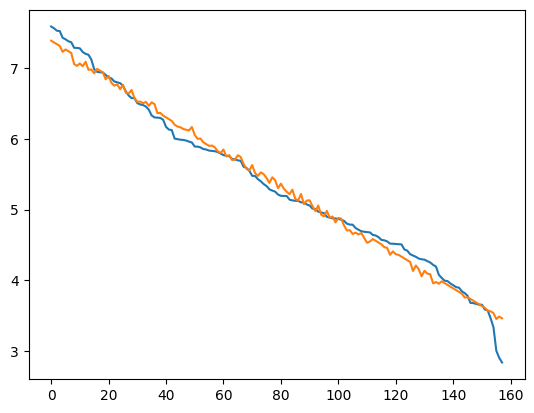

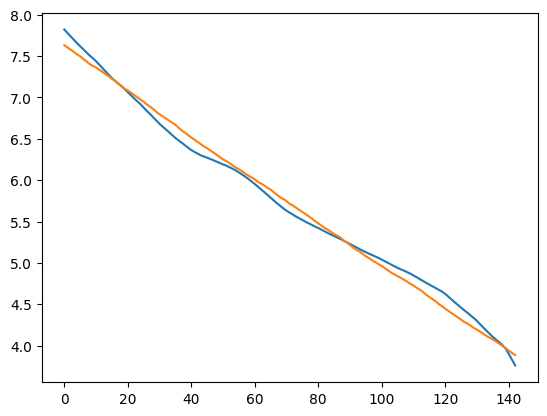

' \nlabelencoder deve ser usado quando vc percebe que o valor numa coluna se repéte, por exemplo, genero musical:[ rock, rock, rock, pop, pop]; o labelencodfer vai dar um número para cada um e agrupar, tipo rock 1, pop .. etc; \n\nA IA da erro quando vc não tira valores de string e tenta calcular, se possdível apar não retirar dados é possível fazer um labelencoder, se os dados se repetirem\n\no erro deve ser avaliado em relação ao valor dos números resultados. Por exemplo, os meus resulatdos variam de 1 a 10 e meu erro foi de 0.1026, isso é bem pouco em relação a 1 e 10;\nSe fosse o vaor de uma cas apor exemplo que pode variar de 200k até um 1 milhão, por exemplo, o erro aceitavel é maior, como uns 16k de erro. Significaria que estpu errasdo em 16 mil reais o preço. Entt., a precisão do erro depende da amplitude dos número avalidados;\n\nValor negativo: Quando o valor é negativo (como -1.18 ou -2.18), significa que o modelo está muito mal. Está fazendo uma previsão pior do que simples

In [6]:
import pandas as pd
from joblib import dump
from sklearn.calibration import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# medir o quaõs felizes as pessoas são

df = pd.read_csv('2015.csv')

"""
"axis=1" indica que a operação é feita ao longo das colunas. Por exemplo, quando você usa df.drop('Happiness Score', axis=1), está removendo a coluna "Happiness Score" do DataFrame. Se fosse axis=0, você removeria linhas. Espero que tenha ficado claro!

tive que tirar o país posi ele é uma string e eu não posso dar label encoder pq ele nn se repete;
"""

Y = df['Happiness Score']
X = df.drop(['Happiness Score','Country'], axis = 1)
lb = LabelEncoder()
X['Region'] = lb.fit_transform(X['Region']) # aqui ele está transformando a região num número

""""
8 folds" se refere a dividir seus dados em 8 partes iguais pra fazer validação cruzada. Isso significa que o modelo é treinado 8 vezes: em cada vez, 7 partes são usadas pra treinar e 1 parte pra testar, garantindo uma avaliação robusta do desempenho. Espero que ajude!

Imagina que o conjunto de dados é dividido em 8 partes iguais. Aí, em cada rodada, uma parte fica de fora, sendo a parte de teste, e as outras 7 são usadas para treinar o modelo. Então, a cada ciclo, uma parte diferente é usada para testar. Isso permite que todos os dados sejam usados tanto para treino quanto para teste. Dessa forma, o modelo é avaliado de maneira mais justa e completa. É como se fosse uma forma de garantir que o modelo se saia bem em qualquer cenário!

A validação cruzada é uma técnica usada para avaliar o desempenho de modelos de machine learning. A ideia é dividir os dados em várias partes e, a cada vez, usar uma parte para testar e as outras para treinar o modelo;  garantindo que o modelo seja avaliado de forma mais robusta e que ele não esteja apenas "decorando" os dados

A cada iteração, o modelo é treinado com 7 partes dos dados e testado com a parte restante, gerando 8 pontuações no total. Em resumo, essa linha faz uma validação cruzada para avaliar a performance do modelo.

Mas lembre-se: cv não pode ser maior do que a quantidade total de amostras no seu conjunto de dados. Se você tiver, por exemplo, só 40 linhas, cv=42 daria erro. Nesse caso, o máximo possível seria cv=40, o que corresponderia à validação cruzada leave-one-out (LOO), onde cada amostra é testada individualmente.

Ficou claro, my lady? ✨

"""

"""
=================== ELASTIC NET ===================

O cross_val_score está avaliando o modelo ElasticNet com os dados brutos (antes do PCA e do train_test_split).
Isso dá uma ideia de como o modelo performa nos dados completos sem alterações. 

ElasticNet(fit_intercept=True): Cria um modelo de regressão ElasticNet, que combina Ridge (L2) e Lasso (L1) para regularização.
fit_intercept=True: Garante que o modelo ajuste um intercepto (bias) na regressão.

alpha=1.0 (padrão) → Controla a força da regularização.
l1_ratio=0.5 (padrão) → Controla o equilíbrio entre Lasso (L1) e Ridge (L2)

"""

# O 'cross_val_score' é uma função do scikit-learn que avalia o desempenho do modelo com validação cruzada
# validação cruzada divide os dados em várias partes
scores = cross_val_score(ElasticNet(fit_intercept = True), X, Y, cv = 8)
print(scores) # Mostra os scores de cada rodada da validação cruzada.

"""
- scores: são pontuações de desempenho de cada uma das iterações da validação cruzada, ou seja, o desempenho do modelo em cada uma das "partes" do conjunto de dados divididos. 

sses valores são os coeficientes de determinação (R²) para cada uma das 8 iterações (já que cv=8), o que significa que ele mede a qualidade do ajuste do seu modelo em cada fold.

R² varia de -∞ a 1:
1 indica uma predição perfeita.
0 significa que o modelo não explica nenhuma variação dos dados.
Valores negativos indicam que o modelo está fazendo pior do que simplesmente prever a média dos dados.

"""

# Cria um modelo PCA que reduz os dados para 8 componentes principais, que são combinações lineares das colunas originais. Isso ajuda a manter a maior parte da informação dos dados, mas com menos variáveis.
pca = PCA(n_components = 8)
# aprende os padrões. Cria novas combinações de colunas que resumem a maior parte da informação dos dados.
pca.fit(X)
# Agora sim ele tramnforma x nesssa novas colunas combinadas, se houverem
X = pca.transform(X)

# 15% dos dados para teste e 85% para treino
# random_state=42 →  Garante que a separação dos dados sempre aconteça da mesma forma, tornando os resultados reproduzíveis.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15,
random_state=42)

"""
Quando usamos GridSearchCV, ele testa todas as combinações possíveis dos valores que passamos nos hiperparâmetros. Ou seja, ele não testa só um alpha e um l1_ratio, mas todos os pares possíveis entre eles.

elastic net : é o modelo de regressão que queremos otimizar. O ElasticNet é um tipo de regressão linear que combina Lasso (L1) e Ridge (L2), e o objetivo aqui é encontrar os melhores valores para os parâmetros alpha e l1_ratio. Regressão Linear é um modelo estatístico usado para prever um valor numérico com base em variáveis de entrada. Ele tenta encontrar a melhor reta que explica a relação entre os dados.

map(lambda x: x / 10, range(1, 10)) divide cada número por 10, criando uma lista assim: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

O map() aplica uma função a todos os elementos de uma lista.

list(range(1, 10))  
# Saída: [1, 2, 3, 4, 5, 6, 7, 8, 9]

list(map(lambda x: x / 10, range(1, 10)))
# Saída: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

Com n_jobs = 4, você está dizendo ao modelo para usar 4 núcleos de processamento ao invés de apenas um.

Como funciona a busca por combinações?
O GridSearchCV vai testar todas as combinações possíveis entre os valores de 'alpha' e 'l1_ratio' que você passou. Por exemplo, se você tiver 9 valores para 'alpha' e 9 valores para 'l1_ratio', o total de combinações será de 81 testes (9 x 9).

O que significa "a melhor combinação"?
Durante o treinamento, o GridSearchCV avalia cada combinação com base em uma métrica de desempenho (geralmente a pontuação de acurácia ou outro critério). Ele então seleciona a combinação de parâmetros que obteve o melhor desempenho.

Após o GridSearchCV encontrar a melhor combinação de parâmetros, ela é armazenada em model.best_estimator_. Isso significa que o modelo foi ajustado com os melhores parâmetros possíveis encontrados.

scoring: Define qual métrica de desempenho será usada para avaliar o modelo. Exemplo: 'accuracy', 'neg_mean_squared_error', 'r2'.

model = GridSearchCV(
    estimator=ElasticNet(),
    param_grid=param_grid,
    scoring='r2',
    n_jobs=4
)
"""

model = GridSearchCV (
ElasticNet(fit_intercept = True),
{
    'alpha': list(map(lambda x: x / 10, range(1, 10))), # ele está treinando 100 modelos, pq o grid vai testar cada combinação de alpha com cada combinação de l1_ratio
    'l1_ratio': list(map(lambda x: x / 10, range(1, 10))),
}, n_jobs = 4 )


""" 
model:
Esse é o modelo de aprendizado de máquina que você está usando. No seu código, é um ElasticNet ou, caso seja o melhor modelo encontrado no GridSearchCV, um modelo ajustado com os melhores hiperparâmetros.

O método fit() é responsável por ajustar o modelo aos dados. Ou seja, ele usa os dados de entrada (X_train) e os valores de saída (Y_train) para aprender como prever os valores de Y com base nos dados de X.

O fit() é um método usado para treinar o modelo com os dados. Ele aprende a partir dos dados fornecidos para tentar entender as relações entre as variáveis de entrada e as variáveis de saída.

Quando você chama model.fit(X_train, Y_train), você está dizendo ao modelo para ajustar os parâmetros internos (como os coeficientes da regressão, no caso do ElasticNet) com base nos dados de entrada (X) e saída (Y) que você passou.

Na verdade, o GridSearchCV não precisa prever os valores finais de Y para saber qual combinação de parâmetros é melhor. Ele usa o desempenho do modelo em dados de validação para isso.

Quando você define scoring='accuracy', o que acontece é que, em cada rodada de validação cruzada, o modelo é avaliado usando a métrica de precisão (accuracy). O GridSearchCV vai então escolher a combinação de parâmetros que maximiza essa precisão.
"""

model.fit(X_train, Y_train) # treinando de fato
print(f"Melhores parametros: {model.best_params_}")
model = model.best_estimator_

dump(model, 'model.pkl') # salva o resultado do modelo em um arquivo

# vendo precfisão nos dados de treino e nos dados de teste
print(f"Erro teste: {mean_absolute_error(Y_test, model.predict(X_test))}")
print(f"Erro treino: {mean_absolute_error(Y_train, model.predict(X_train))}")


Ypred = model.predict(X)

plt.plot(Y)
plt.plot(Ypred)
plt.show()

""" 
    wR → Janela deslizante dos últimos 15 valores reais (Y).
    wP → Janela deslizante dos últimos 15 valores previstos (Ypred).
    Ymm → Armazena a média dos últimos 15 valores reais.
    Ypmm → Armazena a média dos últimos 15 valores previstos.
"""

wR = []
wP = []
Ymm = []
Ypmm = []

for i in range(len(Y)):
  wR.append(Y[i])
  wP.append(Ypred[i])
  if len(wR) > 15:
    Ymm.append(sum(wR) / 15)
    Ypmm.append(sum(wP) / 15)
    wR.pop(0)
    wP.pop(0)

plt.plot(Ymm)
plt.plot(Ypmm)
plt.show()


""" 
labelencoder deve ser usado quando vc percebe que o valor numa coluna se repéte, por exemplo, genero musical:[ rock, rock, rock, pop, pop]; o labelencodfer vai dar um número para cada um e agrupar, tipo rock 1, pop .. etc; 

A IA da erro quando vc não tira valores de string e tenta calcular, se possdível apar não retirar dados é possível fazer um labelencoder, se os dados se repetirem

o erro deve ser avaliado em relação ao valor dos números resultados. Por exemplo, os meus resulatdos variam de 1 a 10 e meu erro foi de 0.1026, isso é bem pouco em relação a 1 e 10;
Se fosse o vaor de uma cas apor exemplo que pode variar de 200k até um 1 milhão, por exemplo, o erro aceitavel é maior, como uns 16k de erro. Significaria que estpu errasdo em 16 mil reais o preço. Entt., a precisão do erro depende da amplitude dos número avalidados;

Valor negativo: Quando o valor é negativo (como -1.18 ou -2.18), significa que o modelo está muito mal. Está fazendo uma previsão pior do que simplesmente prever a média de Y.
Valores positivos: Quando o valor é positivo (como 0.87 ou 0.68), significa que o modelo está fazendo um bom trabalho, mas não está explicando 100% da variação nos dados (idealmente seria 1, mas 0.68 ainda é bom).

"""